In [29]:
from ds_utils.imports import *

In [30]:
from imp import reload
import ds_utils.misc; reload(ds_utils.misc)

<module 'ds_utils.misc' from '/tmp/ds-utils/ds_utils/misc.py'>

### Regular model using all training data

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
# see https://github.com/yang-zhang/code-data-science/blob/master/numpy_newaxis.ipynb
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [33]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 1, 28, 28), (60000, 10), (10000, 1, 28, 28), (10000, 10))

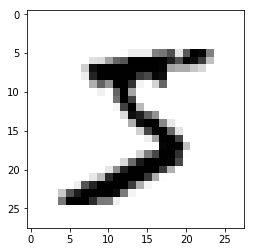

In [35]:
ds_utils.misc.imshow_gray(X_train[0][0])

In [36]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [37]:
def make_compile_model():
    model = keras.models.Sequential([
        keras.layers.Convolution2D(
            filters=32,
            kernel_size=(3, 3),
            activation='relu',
            input_shape=(1, 28, 28)),
        keras.layers.Convolution2D(
            filters=32, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(lr=0.001),
        loss=keras.losses.categorical_crossentropy,
        metrics=['accuracy'])
    return model

In [94]:
model = make_compile_model()
model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 504s - loss: 0.8780 - acc: 0.8868 - val_loss: 0.0811 - val_acc: 0.9741

### Suppose we only have a smaller training set.

In [38]:
train_small = np.random.choice(range(X_train.shape[0]), 100)
X_train_small, y_train_small = X_train[train_small], y_train[train_small]

In [39]:
test_small = np.random.choice(range(X_test.shape[0]), 500)
X_test_small, y_test_small = X_test[test_small], y_test[test_small]

In [40]:
X_train_small.shape, y_train_small.shape, X_test_small.shape, y_test_small.shape

((100, 1, 28, 28), (100, 10), (500, 1, 28, 28), (500, 10))

Performance is worse on smaller data as expected.

In [ ]:
model = make_compile_model()
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=50)
model.fit(X_train_small, y_train_small, validation_data=[X_test_small, y_test_small], epochs=500)

In [42]:
model_path = 'models/pseudo_labeling_weights.h5'

In [24]:
model.save_weights(model_path)

Train on 100 samples, validate on 500 samples
Epoch 1/500
100/100 [==============================] - 0s - loss: 13.4324 - acc: 0.1300 - val_loss: 12.0313 - val_acc: 0.2200
Epoch 2/500
100/100 [==============================] - 1s - loss: 13.4075 - acc: 0.1600 - val_loss: 14.4727 - val_acc: 0.0980
Epoch 3/500
100/100 [==============================] - 0s - loss: 12.9097 - acc: 0.1900 - val_loss: 14.5121 - val_acc: 0.0980

### Psudo labeling

In [43]:
model = make_compile_model()
model.load_weights(model_path)

In [44]:
X_pseudo = X_test
y_pseudo = model.predict(X_test)

In [ ]:
X_comb_pseudo = np.concatenate([X_train, X_pseudo])
y_comb_pseudo = np.concatenate([y_train, y_pseudo])

In [ ]:
model.fit(X_comb_pseudo, y_comb_pseudo, validation_data=[X_test, y_test], epochs=5)

Train on 70000 samples, validate on 10000 samples
Epoch 1/5
70000/70000 [==============================] - 582s - loss: 0.3665 - acc: 0.9030 - val_loss: 0.1423 - val_acc: 0.9588

Ref: 
- https://github.com/yang-zhang/deep-learning/blob/master/MNIST_keras.ipynb
- https://github.com/yang-zhang/courses/blob/master/deeplearning1/nbs/statefarm.ipynb